In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/deceptive-opinion.csv')

In [ ]:
df

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...,...
1595,deceptive,intercontinental,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,amalfi,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,intercontinental,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,palmer,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [ ]:
df.isnull().sum()

deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

In [ ]:
df['hotel'].unique()

array(['conrad', 'hyatt', 'omni', 'fairmont', 'sheraton', 'knickerbocker',
       'homewood', 'swissotel', 'ambassador', 'affinia', 'hardrock',
       'talbott', 'hilton', 'james', 'monaco', 'sofitel', 'palmer',
       'intercontinental', 'allegro', 'amalfi'], dtype=object)

In [ ]:
df['source'].unique()

array(['TripAdvisor', 'MTurk', 'Web'], dtype=object)

<Axes: xlabel='deceptive', ylabel='count'>

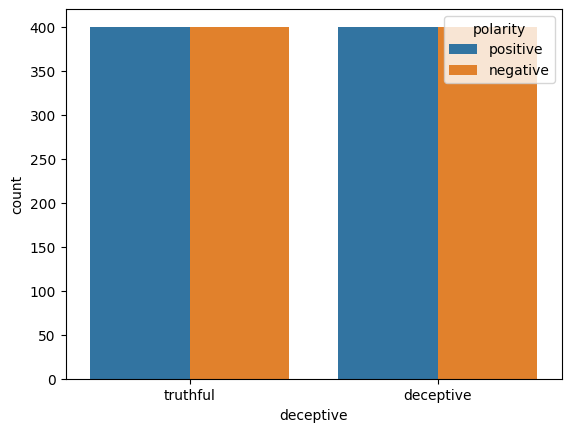

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['deceptive'],hue='polarity',data=df)

<Axes: xlabel='deceptive', ylabel='count'>

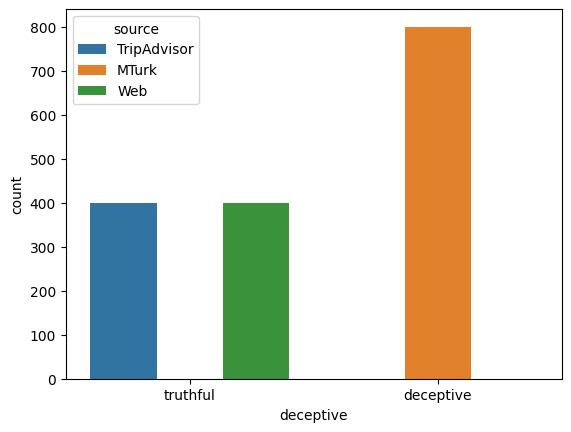

In [ ]:
sns.countplot(x=df['deceptive'],hue='source',data=df)

<Axes: xlabel='deceptive', ylabel='count'>

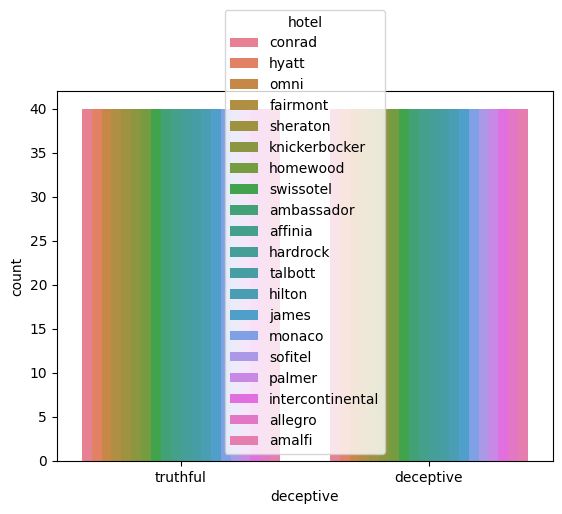

In [ ]:
sns.countplot(x=df['deceptive'],hue='hotel',data=df)

In [ ]:
#drop the feature hotel
df=df.drop(['hotel'],axis=1)

In [ ]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,I asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,Problems started when I booked the InterContin...
1596,deceptive,negative,MTurk,The Amalfi Hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,The Intercontinental Chicago Magnificent Mile ...
1598,deceptive,negative,MTurk,"The Palmer House Hilton, while it looks good i..."


In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
import string
def text_cleaning(text):
    '''
    Make text lowercase, remove text in square brackets,remove links,remove special characters
    and remove words containing numbers.
    '''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    return text

In [ ]:
df['text']=df['text'].apply(text_cleaning)

In [ ]:
df

,deceptive,polarity,source,text
0,truthful,positive,TripAdvisor,we stayed for a one night getaway with family ...
1,truthful,positive,TripAdvisor,triple a rate with upgrade to view room was le...
2,truthful,positive,TripAdvisor,this comes a little late as i m finally catchi...
3,truthful,positive,TripAdvisor,the omni chicago really delivers on all fronts...
4,truthful,positive,TripAdvisor,i asked for a high floor away from the elevato...
...,...,...,...,...
1595,deceptive,negative,MTurk,problems started when i booked the intercontin...
1596,deceptive,negative,MTurk,the amalfi hotel has a beautiful website and i...
1597,deceptive,negative,MTurk,the intercontinental chicago magnificent mile ...
1598,deceptive,negative,MTurk,the palmer house hilton while it looks good i...


In [ ]:
df['complete_text']=df['source'] + '' +df['text']

In [ ]:
x=df['complete_text']
y=df['deceptive']

In [ ]:
x.head()

0    TripAdvisorwe stayed for a one night getaway w...
1    TripAdvisortriple a rate with upgrade to view ...
2    TripAdvisorthis comes a little late as i m fin...
3    TripAdvisorthe omni chicago really delivers on...
4    TripAdvisori asked for a high floor away from ...
Name: complete_text, dtype: object

In [ ]:
# prompt: in x.head() i want to drop the sr no field and only keep text

x.head()[1:]


1    TripAdvisortriple a rate with upgrade to view ...
2    TripAdvisorthis comes a little late as i m fin...
3    TripAdvisorthe omni chicago really delivers on...
4    TripAdvisori asked for a high floor away from ...
Name: complete_text, dtype: object

In [ ]:
print(x)

0       TripAdvisorwe stayed for a one night getaway w...
1       TripAdvisortriple a rate with upgrade to view ...
2       TripAdvisorthis comes a little late as i m fin...
3       TripAdvisorthe omni chicago really delivers on...
4       TripAdvisori asked for a high floor away from ...
                              ...                        
1595    MTurkproblems started when i booked the interc...
1596    MTurkthe amalfi hotel has a beautiful website ...
1597    MTurkthe intercontinental chicago magnificent ...
1598    MTurkthe palmer house hilton  while it looks g...
1599    MTurkas a former chicagoan  i m appalled at th...
Name: complete_text, Length: 1600, dtype: object


In [ ]:
# Assuming your DataFrame is named 'df' and the column containing text is named 'text_column'
print(x.iloc[1595])


MTurkproblems started when i booked the intercontinental chicago online at the hotel s site  and got a server error  somehow i managed to get my reservation  and wish i had looked elsewhere on this great chicago street  filled with plenty of other options  the server errors continued at check in and didn t let up  i was on a holiday weekend  but far too many others must have been pushy conventioneers  and i had trouble getting served  the hotel is enormous and doesn t give a sense of comfort  the health facilities are also just too big  so noisy and crowded  and internet access was   a day  kind of surprising when i can go around the corner to a starbucks  next time  i ll pick a more intimate place nearby  without so many  server errors   


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
# Processed_Text = vectorizer.fit_transform(df['complete_text'])


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,3))

In [ ]:
print(x_train)

728     MTurkif you have the money  amalfi hotel is th...
48      TripAdvisorfor the price of the marriott we sp...
644     MTurki traveled to chicago with my husband for...
615     MTurki recently stayed in the talbott hotel in...
757     MTurkamalfi hotel chicago has several factors ...
                              ...                        
763     MTurkthe intercontinental chicago is convenien...
835     Webseriously overpriced the room was clean and...
1216    MTurka friend and i stayed at the hyatt regenc...
559     MTurki stayed at this hotel for a weekend and ...
684     MTurki have heard friends talking about the ho...
Name: complete_text, Length: 1280, dtype: object


In [ ]:
x_train=cv.fit_transform(x_train)

In [ ]:
print(x_train)

  (0, 108680)	1
  (0, 212710)	5
  (0, 75183)	1
  (0, 164799)	9
  (0, 106995)	1
  (0, 5681)	1
  (0, 79579)	3
  (0, 88720)	3
  (0, 131263)	1
  (0, 62212)	2
  (0, 3446)	2
  (0, 199642)	1
  (0, 65949)	3
  (0, 90676)	1
  (0, 178504)	1
  (0, 42638)	1
  (0, 52250)	1
  (0, 98015)	1
  (0, 179839)	5
  (0, 82046)	1
  (0, 60968)	1
  (0, 33388)	2
  (0, 177216)	2
  (0, 74795)	1
  (0, 13789)	2
  :	:
  (1279, 18103)	1
  (1279, 79621)	1
  (1279, 7059)	1
  (1279, 4061)	1
  (1279, 196481)	1
  (1279, 78219)	1
  (1279, 84316)	1
  (1279, 80285)	1
  (1279, 69985)	1
  (1279, 142714)	1
  (1279, 69995)	1
  (1279, 147602)	1
  (1279, 71529)	1
  (1279, 179469)	1
  (1279, 8460)	1
  (1279, 58359)	1
  (1279, 30990)	1
  (1279, 28711)	1
  (1279, 174349)	1
  (1279, 174790)	1
  (1279, 10395)	1
  (1279, 131615)	1
  (1279, 111649)	1
  (1279, 207667)	1
  (1279, 80739)	1


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=100000)
lr.fit(x_train,y_train)
pred_1=lr.predict(cv.transform(x_test))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'y' contains the class labels (truthful and deceptive)
y = ['truthful', 'deceptive', 'truthful', 'deceptive', 'truthful']

# Initialize and fit the LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Check the mapping of classes to labels
print("Classes:", le.classes_)
# Output: Classes: ['deceptive' 'truthful']

# Now, y_encoded contains the encoded labels
print("Encoded labels:", y_encoded)
# Output: Encoded labels: [1 0 1 0 1]


Classes: ['deceptive' 'truthful']
Encoded labels: [1 0 1 0 1]


In [ ]:
from sklearn.metrics import accuracy_score
score_1=accuracy_score(y_test,pred_1)

In [ ]:
print(x_test)

1073    Webi never write these reviews  but felt that ...
326     TripAdvisorwe stayed at the palmer house hilto...
1557    MTurkmy experience at the amalfi hotel in chic...
918     Webthis review has two parts     i advise read...
974     Webwe chose to stay at a small hotel because w...
                              ...                        
583     MTurk classy   decent  and  serene   these wor...
1       TripAdvisortriple a rate with upgrade to view ...
1566    MTurkthe pictures on this website sure are dec...
554     MTurki just spent a week at the millennium kni...
1323    MTurki had wanted to stay in this hotel since ...
Name: complete_text, Length: 320, dtype: object


In [ ]:
print(y_test)

[1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1
 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1
 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1
 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1
 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0]


In [ ]:
score_1

0.896875

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       165
           1       0.90      0.88      0.89       155

    accuracy                           0.90       320
   macro avg       0.90      0.90      0.90       320
weighted avg       0.90      0.90      0.90       320



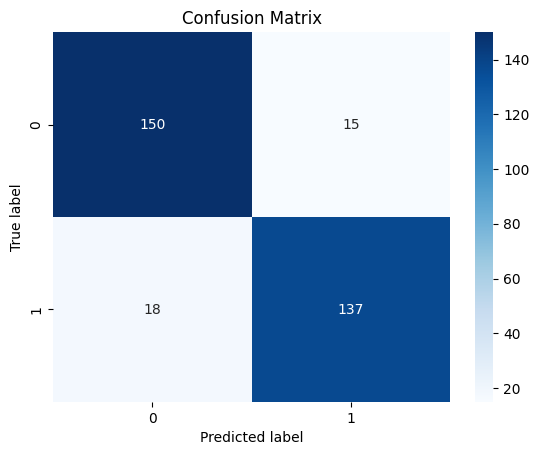

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

pred_1 = lr.predict(cv.transform(x_test))
print(classification_report(y_test, pred_1))

# Generate the confusion matrix
cm = confusion_matrix(y_test, pred_1)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_2=svm.predict(cv.transform(x_test))
score_2=accuracy_score(y_test,pred_2)

In [ ]:
score_2

0.8625

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       165
           1       0.86      0.85      0.86       155

    accuracy                           0.86       320
   macro avg       0.86      0.86      0.86       320
weighted avg       0.86      0.86      0.86       320



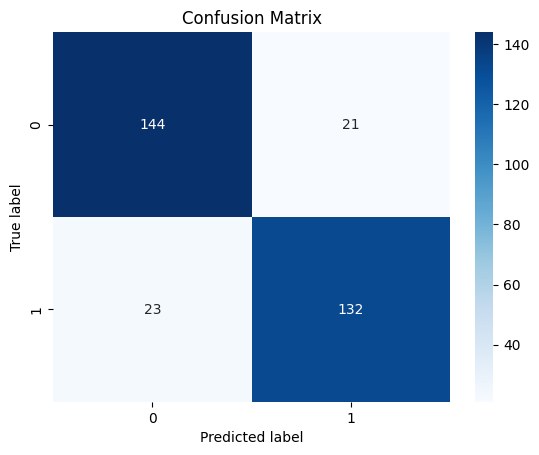

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the classification report
print(classification_report(y_test, pred_2))

# Generate the confusion matrix
cm = confusion_matrix(y_test, pred_2)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
pred_3=nb.predict(cv.transform(x_test))
score_3=accuracy_score(y_test,pred_3)

In [ ]:
score_3

0.9

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       165
           1       0.97      0.82      0.89       155

    accuracy                           0.90       320
   macro avg       0.91      0.90      0.90       320
weighted avg       0.91      0.90      0.90       320



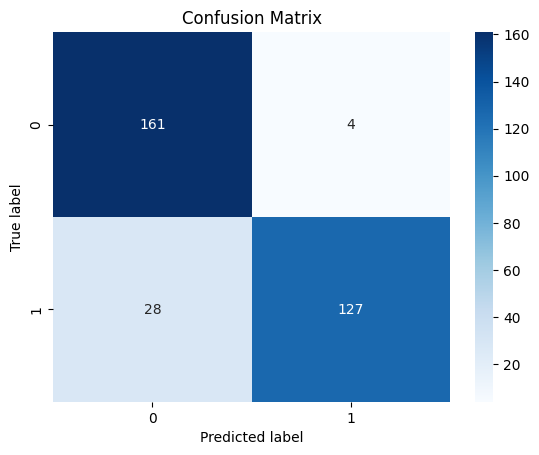

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the classification report
print(classification_report(y_test, pred_3))

# Generate the confusion matrix
cm = confusion_matrix(y_test, pred_3)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

# **Save the model**

In [ ]:
filename = "Deceptive_Opinion_model.sav"
countvectorizer = "Count_Vectorizer_model.sav"

In [ ]:
import pickle

In [ ]:
pickle.dump(lr, open(filename, "wb"))
pickle.dump(cv, open(countvectorizer, "wb"))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Load the models
loaded_model = pickle.load(open('Deceptive_Opinion_model.sav', 'rb'))
cv_model = pickle.load(open('Count_Vectorizer_model.sav', 'rb'))

# Define the input data
input_data = ["triple a rate with upgrade to view room was"]

# Transform the input data using the Count Vectorizer
input_data_transformed = cv_model.transform(input_data)

# Make predictions using the loaded model
predictions = loaded_model.predict(input_data_transformed)
print(predictions)
# Output the predic

if(predictions == 1):
  print("The review is Truthful")
else:
  print("The review is Deceptive")


[1]
The review is Truthful


Ensemble Accuracy: 0.903125
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       165
           1       0.91      0.88      0.90       155

    accuracy                           0.90       320
   macro avg       0.90      0.90      0.90       320
weighted avg       0.90      0.90      0.90       320



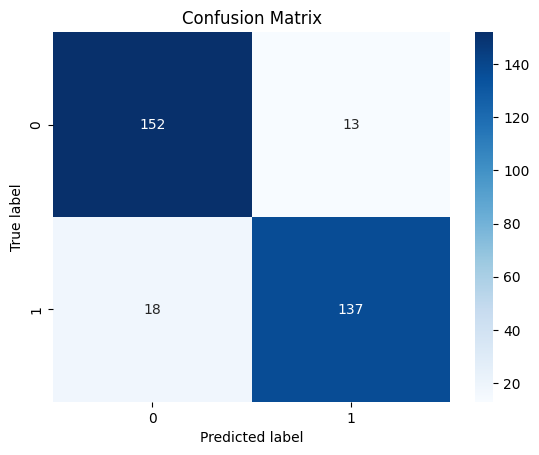

In [ ]:
from sklearn.ensemble import VotingClassifier

# Create a list of base models
estimators = list()

estimators.append(('Logistic', lr))
estimators.append(('SVM', svm))
estimators.append(('Naive Bayes', nb))

# Create the ensemble model
ensemble = VotingClassifier(estimators)

# Train the ensemble model
ensemble.fit(x_train, y_train)

x_test_transformed = cv_model.transform(x_test)

# Make predictions on the test set
predictions = ensemble.predict(x_test_transformed)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, predictions)
print('Ensemble Accuracy:', accuracy)

# Generate the classification report
print(classification_report(y_test, predictions))

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()
